# 📚 Week 2 – Data Collection & Extraction

## 📝 Tesseract OCR Guide

Tesseract is an open-source Optical Character Recognition (OCR) engine developed by Google. It is used to convert scanned images, PDFs, and images with text into machine-readable text. Tesseract supports more than 100 languages, including complex scripts like Arabic, Chinese, and many others.

---

## 🔧 Installation

### **Installing Tesseract on Different Platforms**

1. **On macOS** (using Homebrew):
    ```bash
    brew install tesseract
    ```

2. **On Ubuntu/Debian**:
    ```bash
    sudo apt update
    sudo apt install tesseract-ocr
    ```

3. **On Windows**:
    - Download the Tesseract installer from the [Tesseract GitHub releases](https://github.com/tesseract-ocr/tesseract/releases).
    - Follow the installation instructions, and ensure to add Tesseract to your system’s `PATH`.

---

## 🛠️ Basic Usage

Once Tesseract is installed, you can use it either from the command line or by using the Python wrapper `pytesseract`.

### **Command Line Usage**

To perform OCR on an image:
```bash
tesseract image.png output.txt


## Use Tesseract with python

In [5]:
from PIL import Image
import pytesseract #pip install pytesseract first

# Load an image using Pillow (PIL)
image = Image.open('test.webp').convert('L')
# Threshold
threshold = 128
image = image.point( lambda p: 255 if p > threshold else 0 )
# To mono
image = image.convert('1')

# Perform OCR on the image
text = pytesseract.image_to_string(image, lang='eng')

print(text)

Noisy image
to test
Tesseract OCR



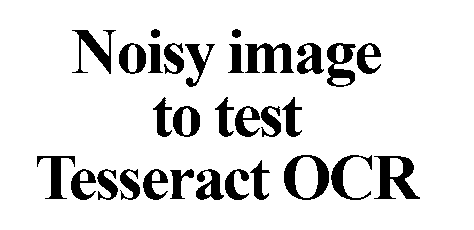

In [6]:
image

In [7]:
image.save('test_binarized.png', 'PNG')  # Save the processed image if needed

Tesseract supports over 100 languages, and you can even train it for custom languages or fonts. To use a different language, you can download the corresponding trained data files and specify the language in the -l flag.

For example, to use Spanish (spa):

In [ ]:
tesseract image.png output -l spa

🧑‍💻 Tesseract Best Practices\
Preprocess Images: Always preprocess images by converting to grayscale, adjusting brightness/contrast, and removing noise to improve Tesseract’s accuracy.

Use Correct --psm: The Page Segmentation Mode (--psm) plays a crucial role in how Tesseract segments the image and interprets the text. Experiment with different modes for complex documents.

Choose the Right Language: Always specify the correct language (-l lang_code) for better accuracy. Tesseract performs poorly when the language is incorrect.

Custom Training: For specialized fonts or languages, you can train Tesseract to recognize custom fonts or languages. This is especially useful for handwriting or unusual fonts.

## Bonus Hands‑on Assignment Sheet
here is bonus part of our homework,which focuses on various aspects of data collection, extraction, and cleaning using OCR (Optical Character Recognition) technology like Tesseract, as well as other techniques such as Web Scraping and Automatic Speech Recognition (ASR). The goal is to apply different tools and methods to extract useful information from web pages, PDFs, audio files, and clean the data for further analysis.

---
### Task Overview

| # | 💡 Module / Skill | 🎯 Task Goal | 🛠️ Core Tools | 📌 Deliverables |
|---|-------------------|--------------|----------------|-----------------|
| **1** | 🌐 *Web Scraping & HTML Cleaning* | **arXiv Paper Abstract Scraper**<br>• Query any subcategory (e.g., *cs.CL*) to fetch the latest 200 papers.<br>• Scrape the `/abs/` page and use **Trafilatura** to clean the content.<br>• Use **Tesseract OCR** to extract abstract text from screenshots of the downloaded pages.<br>• Save the data as JSON: `{url, title, abstract, authors, date}` | `trafilatura`,  `pytesseract`,  | `arxiv_clean.json` (≤1MB) + scraper script |
| **2** | 🖼️ *PDF to Text OCR* | **Batch OCR for arXiv PDFs** (same paper set as Task 1).<br>• Use **Tesseract** to convert PDFs to text.<br>• Retain OCR layout (e.g., titles, sections) if needed. | `pytesseract`, `pdf2image` | `pdf_ocr/` folder with TXT files + code notebook |
| **3** | 🔊 *Automatic Speech Recognition (ASR)* | **Whisper Transcription Bot** for 10 short NLP conference talks (~3 minutes each).<br>• Use **yt‑dl** to fetch YouTube audio.<br>• Transcribe with **Tesseract** for any OCR-based text in the transcript images.<br>• Save `.jsonl` with timestamps. | `yt-dlp`, `pytesseract` | `talks_transcripts.jsonl` + transcription script |
| **4** | 🧹 *Data Cleaning & Deduplication* | **End‑to‑End Cleaner**:<br>• Merge the outputs from Tasks 1‑3 into one dataset.<br>• Steps: language detection → strip HTML noise → use MinHash for deduplication (similarity ≥ 0.7) → remove PII (emails, credit card numbers, phone numbers) → remove repetitive n‑grams. | `langdetect`, `datasketch` | `clean_corpus.txt` + `stats.md` (token count, removal percentage) |



### 💬 Resources

1. **Trafilatura Quick Start:**  
   - [Trafilatura Documentation](https://github.com/adbar/trafilatura)  
   - Usage: `trafilatura.extract(html, include_comments=False, include_tables=False)`

2. **Tesseract OCR:**  
   - [Tesseract OCR GitHub Repository](https://github.com/tesseract-ocr/tesseract)  
   - [Tesseract OCR Documentation](https://tesseract-ocr.github.io/)  
   - [pytesseract Python Wrapper Documentation](https://github.com/madmaze/pytesseract)  
   - Use Tesseract for OCR conversion of PDFs or images. For complex layouts, use **Tesseract’s layout analysis** feature.  
     - Example: `text = pytesseract.image_to_string(image, config='--psm 6')`

3. **Whisper Automatic Speech Recognition (ASR):**  
   - [Whisper GitHub Repository](https://github.com/openai/whisper)  
   - [Whisper Documentation](https://github.com/openai/whisper#usage)  
   - To use Whisper with Python, follow the setup instructions provided on the official repository.

4. **yt-dlp for Downloading YouTube Audio:**  
   - [yt-dlp GitHub Repository](https://github.com/yt-dlp/yt-dlp)  
   - [yt-dlp Installation and Usage](https://github.com/yt-dlp/yt-dlp#installation)

5. **PDF to Image Conversion (Using `pdf2image`):**  
   - [pdf2image Documentation](https://pdf2image.readthedocs.io/en/latest/)  
   - This library converts PDF pages to images, which you can then process with Tesseract.

6. **MinHash for Deduplication:**  
   - [Datasketch Documentation](https://datasketch.readthedocs.io/en/latest/)  
   - **MinHashLSH** is useful for deduplicating large text corpora by finding similar documents.

7. **Cleaning HTML and Removing PII (Personally Identifiable Information):**  
   - [BeautifulSoup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)  
   - **langdetect** Python library for language detection:  
     - [langdetect GitHub Repository](https://github.com/Mimino666/langdetect)


---




## 1. Web Scraping & HTML Cleaning

In [ ]:
# use trafilatura to scrape cs.CV according to the instructions
# pip install trafilatura
import trafilatura
from trafilatura import fetch_url, extract
# Fetch the content of the URL
url = 'https://arxiv.org/list/cs.CV/recent'
downloaded_content = fetch_url(url)
# Extract the text content from the downloaded HTML
extracted_text = extract(downloaded_content)
# Print the extracted text
print(extracted_text)